<a href="https://colab.research.google.com/github/SallyPosey/DW_app/blob/main/BonusMod6BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Team 7
*   Dr Lee Data Wrangling Spring 2025
*   Module 6


#Bonus Challenge: Binary Classification & Resampling
*   Task: Identify a binary classification dataset. Perform data resampling and compare model performance (using Logistic Regression or other algorithm) before and after resampling.
*   Deliverable: Comparative analysis report with model scores.
    * Evaluation Criteria:
    * Accuracy and efficiency of data wrangling techniques.
    * Creativity in feature engineering and data insights.
    * Clarity and aesthetics of visualizations.
    * Quality of the final report and code documentation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
#Dataset
url = "https://raw.githubusercontent.com/SallyPosey/SalsDatasets/refs/heads/main/bankruptcy.csv"
df = pd.read_csv(url)

#Structural and Quality Investigation


In [ ]:
df.info()
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

,0
Bankrupt?,2
ROA(C) before interest and depreciation before interest,3333
ROA(A) before interest and % after tax,3151
ROA(B) before interest and depreciation after tax,3160
Operating Gross Margin,3781
...,...
Liability to Equity,6819
Degree of Financial Leverage (DFL),6240
Interest Coverage Ratio (Interest expense to EBIT),6240
Net Income Flag,1


In [ ]:
#Way too many columns, I'm narrowing it down to 12 features and my target
df_lim = df.iloc[:, [0, 1, 6, 8, 90, 33, 34, 57, 36, 66, 80, 81, 85]]

In [ ]:
df_lim.info()
#no nulls, all numeric, looks good!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    Operating Profit Rate                                    6819 non-null   float64
 3    After-tax net Interest Rate                              6819 non-null   float64
 4    Net Income to Stockholder's Equity                       6819 non-null   float64
 5    Current Ratio                                            6819 non-null   float64
 6    Quick Ratio                                              6819 non-null   float64
 7    Cash/Total Assets                                        6819 non-null   float64
 8    Total debt/Total 

In [ ]:
df_lim.nunique()

,0
Bankrupt?,2
ROA(C) before interest and depreciation before interest,3333
Operating Profit Rate,3376
After-tax net Interest Rate,3604
Net Income to Stockholder's Equity,6819
Current Ratio,6132
Quick Ratio,6094
Cash/Total Assets,6819
Total debt/Total net worth,5518
Current Liabilities/Equity,6819


In [ ]:
#Split features and target variable
y = df_lim['Bankrupt?']
X = df_lim.drop(columns=['Bankrupt?'])

In [ ]:
#Handle outliers using IQR (TUKEY METHOD) - Only on X (features)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter X based on outlier bounds
X = X[~((X < lower_bound) | (X > upper_bound)).any(axis=1)]

#Get the corresponding target values (y) for the filtered X
y = y[X_filtered.index]

In [ ]:
#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training the Model

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Check class distribution before resampling
print("Before Resampling:")
print(y_train.value_counts())

Before Resampling:
Bankrupt?
0    3225
1      48
Name: count, dtype: int64


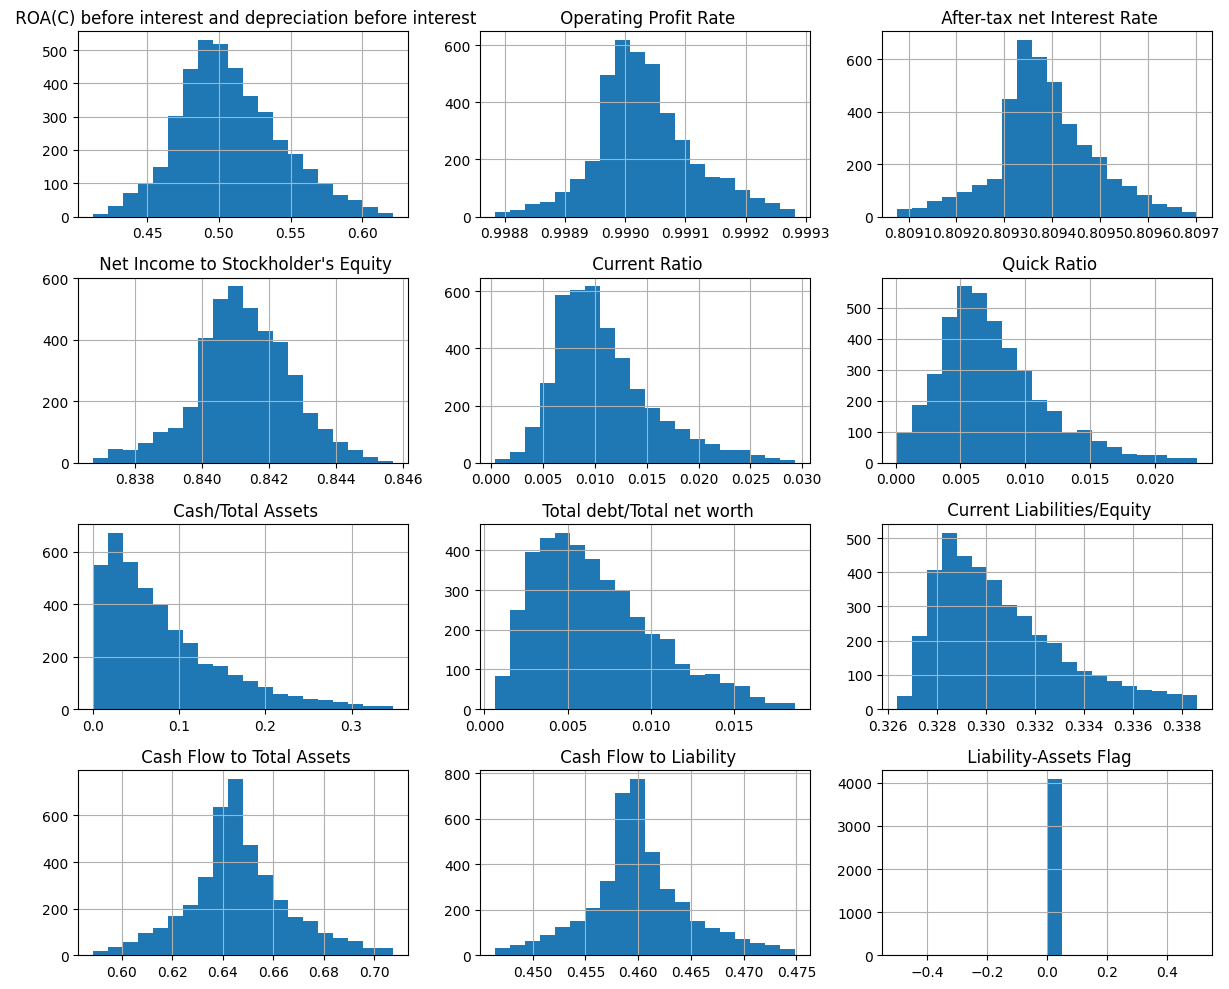

In [ ]:
#Checking distribution of features in order to choose best resampling technique
#Create histograms for each feature
X.hist(figsize=(12, 10), bins=20)  # Adjust figsize and bins as needed
plt.tight_layout()  # Prevent overlapping labels
plt.show()

In [ ]:
smote = SMOTE(sampling_strategy=0.333, random_state=42)  # Oversample 1/3
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("After Resampling:")
print(y_train_resampled.value_counts())

After Resampling:
Bankrupt?
0    3225
1    1073
Name: count, dtype: int64


In [ ]:
#Train Logistic Regression model before and after resampling
models = {'Before Resampling': (X_train, y_train), 'After Resampling': (X_train_resampled, y_train_resampled)}

#Quality Analysis

In [ ]:
for desc, (X_t, y_t) in models.items():
    model = LogisticRegression()
    model.fit(X_t, y_t)
    y_pred = model.predict(X_test)
    print(f"\nModel Performance - {desc}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Model Performance - Before Resampling
Accuracy: 0.9829059829059829
Confusion Matrix:
 [[805   2]
 [ 12   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       807
           1       0.00      0.00      0.00        12

    accuracy                           0.98       819
   macro avg       0.49      0.50      0.50       819
weighted avg       0.97      0.98      0.98       819


Model Performance - After Resampling
Accuracy: 0.9291819291819292
Confusion Matrix:
 [[755  52]
 [  6   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       807
           1       0.10      0.50      0.17        12

    accuracy                           0.93       819
   macro avg       0.55      0.72      0.57       819
weighted avg       0.98      0.93      0.95       819



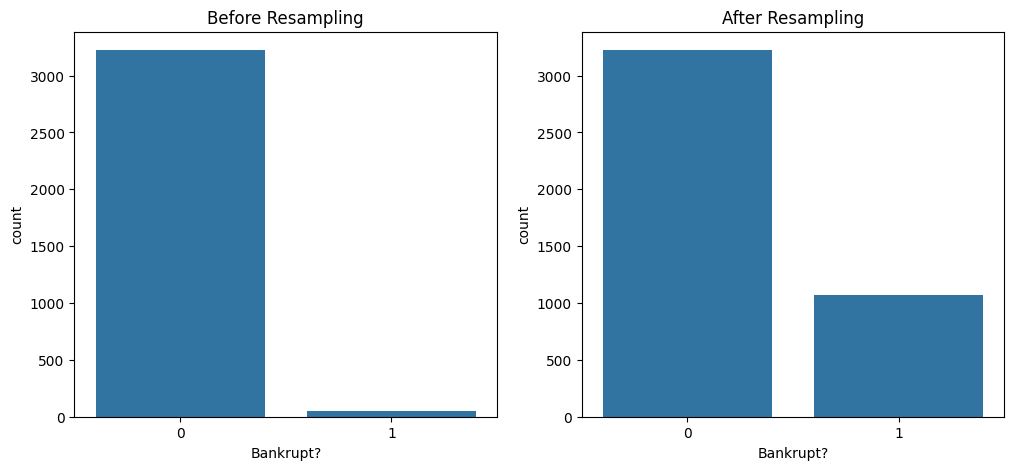

In [ ]:
#Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title("Before Resampling")
sns.countplot(x=y_train_resampled, ax=ax[1])
ax[1].set_title("After Resampling")
plt.show()


#FINAL SUMMARY

*  Before SMOTE resampling there was a large class imbalance for our target. Class imbalances are bad for machine learning models because the model can become biased toward the majority class, leading to poor performance (BIAS IN AI).

*  We used SMOTE to create synthetic instances of minority class that are similar to existing examples but not identical. This oversamples the minority class without overfitting the data (which could happen if for instance we duplicated existing instances).

*  Instead of oversampling the entire minority class, we utilized the built-in sampling_strategy parameter of the SMOTE object, opting to oversample only one-third of the minority class. This approach helps minimize accuracy loss. Prior to this decision, we tested a 1:1 ratio (fully balancing the minority and majority classes) and a 1:2 ratio (oversampling 50% of the minority class). While these methods were more effective at reducing bias, they resulted in lower overall accuracy.

*  Given the nature of our data (predicting company bankruptcy), we selected a 1:3 ratio as the optimal balance between accuracy and bias reduction. Prioritizing bankruptcy predictions, even at the cost of a slight decrease in accuracy, is preferable to a model that underestimates bankruptcy risk due to dataset bias. Since the minority class represents bankrupt companies (label 1), this approach aligns with our objective.

*  Overall, while our model's accuracy slightly declined for this dataset, it is designed to better identify bankrupt companies in future datasets, helping to mitigate the bias introduced by the original class imbalance.